In [2]:
from phidl import Device
import phidl.geometry as pg
from phidl import quickplot as qp
import numpy as np

def connect_with_taper(port1, port2, layer=None):
    """
    Connects two device ports with a taper based on their existing positions.
    
    Parameters:
    -----------
    port1 : Port
        The first port to connect (starting point).
    port2 : Port
        The second port to connect (end point).
    layer : Layer
        The GDS layer to use for the taper. Uses the layer of `port1` if not specified.
    
    Returns:
    --------
    D : Device
        A device containing the taper connecting the two ports.
    """
    D = Device()

    # Calculate taper parameters based on the ports
    start_width = port1.width
    end_width = port2.width
    if layer is None:
        layer = port1.layer

    # Calculate the distance between the two ports
    x1, y1 = port1.midpoint
    x2, y2 = port2.midpoint
    taper_length = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    # Create the taper geometry
    taper = pg.taper(length=taper_length, width1=start_width, width2=end_width, layer=layer)

    # Add the taper to the device
    taper_ref = D.add_ref(taper)

    # Align the taper: first align it with port1
    taper_ref.connect(port="o1", destination=port1)

    # Rotate and position the taper to align with port2
    taper_angle = np.arctan2(y2 - y1, x2 - x1) * 180 / np.pi
    taper_ref.rotate(angle=taper_angle, center=port1.midpoint)
    taper_ref.move(origin=taper_ref.ports['o2'].midpoint, destination=port2.midpoint)

    # Add ports to the new device to preserve connectivity
    D.add_port(name="o1", port=taper_ref.ports["o1"])
    D.add_port(name="o2", port=taper_ref.ports["o2"])

    return D

# Example usage of the function
D = Device()

# Create two example waveguides with ports to connect
waveguide1 = D << pg.straight(length=10, width=0.5)
waveguide2 = D << pg.straight(length=10, width=1.0)

# Move the second waveguide to the right and up (correct position)
waveguide2.move((15, 10))  # This positions the two ports properly

# Connect their ports with a taper (automatically calculating the taper length)
taper = connect_with_taper(waveguide1.ports['o2'], waveguide2.ports['o1'])
D.add_ref(taper)

# Display the result
qp(D)


TypeError: straight() got an unexpected keyword argument 'length'

In [ ]:
for n in range(12):

    print(int(n/3)+2)

for n in range(5):

    print(n)



2
2
2
3
3
3
4
4
4
5
5
5
0
1
2
3
4


In [ ]:
import math

for n in range(5):

    print(2**(n+2)-1)

3
7
15
31
63


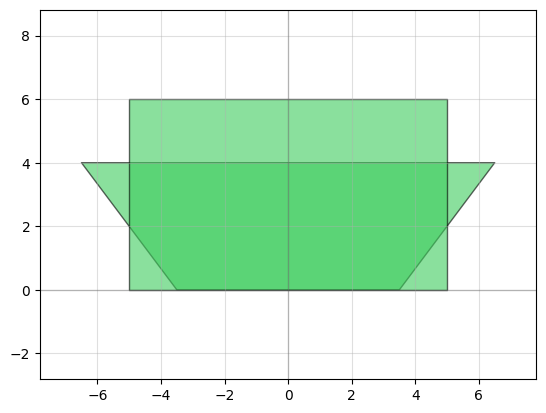

In [ ]:
import phidl.geometry as pg
from phidl import Device
import numpy as np
from phidl import quickplot as qp

def trapezoid(center_width, height, angle):
    # Convert angle to radians
    angle_rad = np.radians(angle)
    
    # Calculate the top and bottom widths
    bottom_width = center_width + height * np.tan(angle_rad)
    top_width = center_width - height * np.tan(angle_rad)
    
    # Define the points of the trapezoid
    points = [
        (-top_width / 2, 0),                          # Top-left
        (top_width / 2, 0),                           # Top-right
        (bottom_width / 2, height),                   # Bottom-right
        (-bottom_width / 2, height),                  # Bottom-left
    ]
    
    # Create the device and add the trapezoid as a polygon
    D = Device()
    D.add_polygon(points)
    return D

# Example usage
D = trapezoid(center_width=10, height=4, angle=36.87)

pcm_top_1 = pg.rectangle(size=(10, 6))
pcm_top_1.move([-5, 0])  # Move bbox rectangle to the correct position
D.add_ref(pcm_top_1)
qp(D)


In [ ]:
from phidl import Device, Layer
import numpy as np

# Define a custom layer
layer = Layer(1, 0, 'MyLayer')

# Define points for the polygon
points = [(-5, 0), (5, 0), (10, 10), (-10, 10)]

# Create a new Device
D = Device()

# Add the polygon to the device on the specified layer
D.add_polygon(points, layer=layer)


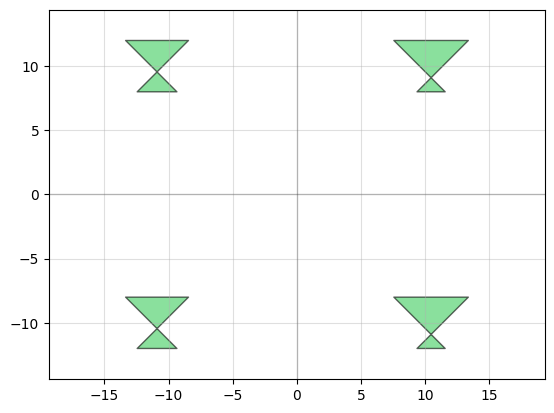

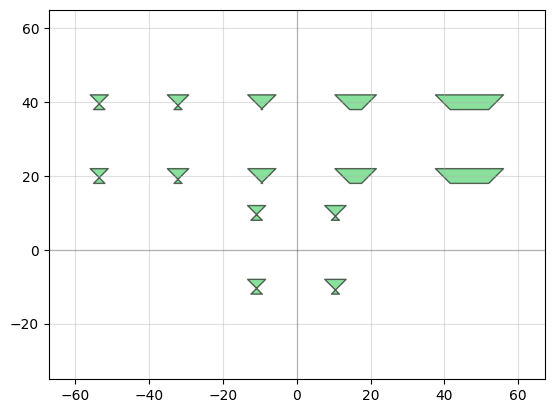

In [ ]:
import phidl.geometry as pg
from phidl import Device
import numpy as np
from phidl import quickplot as qp

def trapezoid(center_width, height, angle):
    # Convert angle to radians
    angle_rad = np.radians(angle)
    
    # Calculate the top and bottom widths
    bottom_width = center_width + height * np.tan(angle_rad)
    top_width = center_width - height * np.tan(angle_rad)
    
    # Define the points of the trapezoid
    points = [
        (-top_width / 2, 0),                          # Top-left
        (top_width / 2, 0),                           # Top-right
        (bottom_width / 2, height),                   # Bottom-right
        (-bottom_width / 2, height),                  # Bottom-left
    ]
    
    # Create the device and add the trapezoid as a polygon
    D = Device()
    D.add_polygon(points)
    return D
Z = Device()

segment_num = 5 #int(n/3)+2 # Create 3 modulators with 2, 3, 4, and 5 pcm secments

pcm_len = 28 #3*pi_len
pcm_wid = 4
spacer = 20 # CHANGE LATER TO 1.5mm = 1500
pi_2 = 14

unit_len = pcm_len/(2**segment_num-1) # this is the length of the smallest PCM segment

l_sum = 0


mzi_height = 10

 # pcm_top = trapezoid(pcm_len, pcm_wid, 45, layer = layer_pcm)
                # pcm_top.move([0, mzi_height])  # Move PCM to the correct position (on top MZI arm)
                # Mod1.add_ref(pcm_top)
# Create a new Device
def makeThing(segment_num):
    J = Device()
    l_sum = 0

    for s in range(segment_num): # 0 1, 0 1 2, 0 1 2 3, 0 1 2 3 4
        ln = unit_len*2**s

        pcm_top = trapezoid(ln, pcm_wid, 45)
        #print(ln/2-len_tot/2+s*spacer+l_sum)
        pcm_top.move([ln/2+s*spacer+l_sum, mzi_height])  # Move PCM to the correct position (on top MZI arm)
        J.add_ref(pcm_top)

        pcm_bot = trapezoid(ln, pcm_wid, 45)
        pcm_bot.move([ln/2+s*spacer+l_sum, -mzi_height])  # Move PCM to the correct position (on top MZI arm)
        J.add_ref(pcm_bot)
        l_sum += ln

    J.center=[0,0]
    return(J)

# bbox = J.bbox

# # Calculate the width and length of the device
# D_width = bbox[1][0] - bbox[0][0]  # x2 - x1
# D_length = bbox[1][1] - bbox[0][1]  # y2 - y1

# # Print the size of the device
# print(f"Device width: {D_width}")
# print(f"Device length: {D_length}")

# Add a rectangle representing the bounding box
# bbox_rect = J << pg.rectangle(size=(bbox[1][0] - bbox[0][0], bbox[1][1] - bbox[0][1]))
# bbox_rect.move([bbox[0][0], bbox[0][1]])  # Move bbox rectangle to the correct position
qp(makeThing(2))

Z.add_ref(makeThing(5))
Z.center = [0,30]
Z.add_ref(makeThing(2))

# i = 2
# for n in range(i): # 0 1 2 3 4
#     print(i+1-n)
#     Z.add_ref(makeThing(i+1-n))
#     Z.center = [0,(30+n*15)]
#     Z.add_ref(makeThing(i+1-n))
#     Z.center = [0,(30+(n+2)*15)]

qp(Z)

In [ ]:
for n in range(8):


    ######################### ADD PCM

    segment_num = int(n/2)+2 # Create 3 modulators with 2, 3, 4, and 5 pcm secments
    print(segment_num)

2
2
3
3
4
4
5
5


In [ ]:
rows = 8
min_seg = 2
max_seg = rows/2 + 1

for n in range(rows):

    segment_num = 0# Create 3 modulators with 2, 3, 4, and 5 pcm secments
    if n < rows/2:
        segment_num = (n%2)*min_seg+((n+1)%2)*max_seg + (-1)**(n+1)
    else:
        segment_num = (n%2)*max_seg+((n+1)%2)*min_seg
    print(segment_num)

4.0
3.0
4.0
3.0
2.0
5.0
2.0
5.0


/var/folders/39/3byfb4ln0nbbfjthv62q1h3m0000gn/T/ipykernel_12612/3986341698.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12)


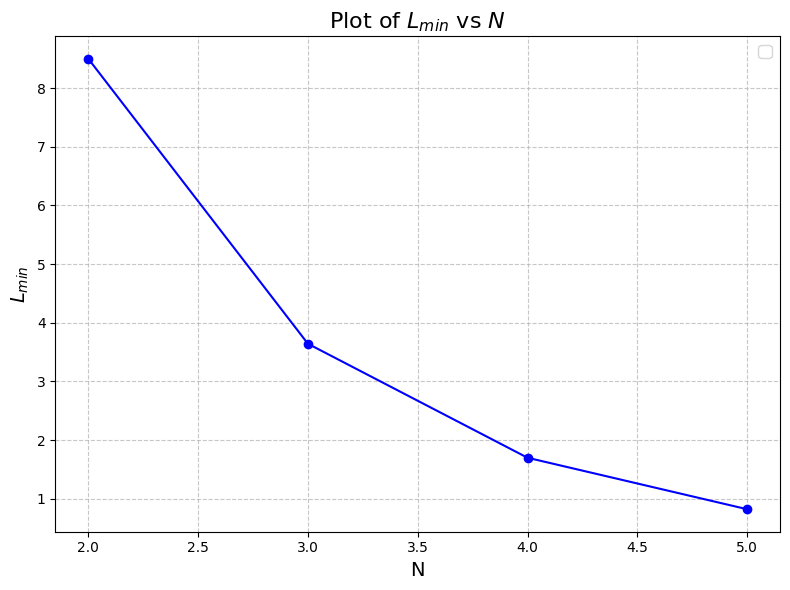

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
pi_len = 8.5
# Define the function L_min
def L_min(N):
    return 3 * pi_len / (2**N - 1)

# Generate values of N
N_values = np.arange(2, 6)  # N from 2 to 5
L_min_values = L_min(N_values)

# Plot L_min versus N
plt.figure(figsize=(8, 6))
plt.plot(N_values, L_min_values, marker='o', linestyle='-', color='b')

# Add labels, title, and legend
plt.xlabel('N', fontsize=14)
plt.ylabel('$L_{min}$', fontsize=14)
plt.title('Plot of $L_{min}$ vs $N$', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

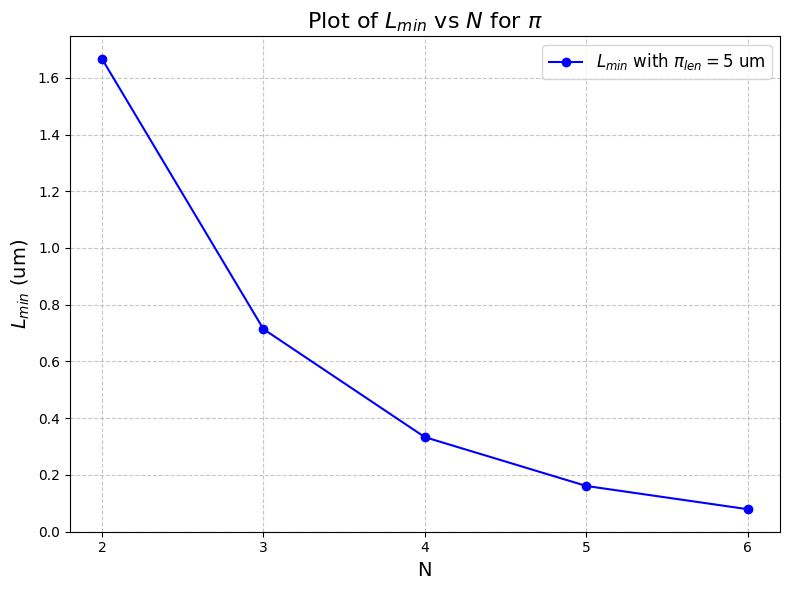

   N  $L_{min}$ (pi_len=5 um)
0  2                 1.666667
1  3                 0.714286
2  4                 0.333333
3  5                 0.161290
4  6                 0.079365


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

pi_len1 = 5
# pi_len2 = 5  # New value for pi_len to overlay

# Define the function L_min
def L_min(N, pi_len):
    return 1 * pi_len / (2**N - 1)

# Generate values of N
N_values = np.arange(2, 7)  # N from 2 to 5
L_min_values1 = L_min(N_values, pi_len1)
# L_min_values2 = L_min(N_values, pi_len2)

# Plot L_min versus N
plt.figure(figsize=(8, 6))
plt.plot(N_values, L_min_values1, marker='o', linestyle='-', color='b', label=f'$L_{{min}}$ with $\pi_{{len}}={pi_len1}$ um')
# plt.plot(N_values, L_min_values2, marker='s', linestyle='--', color='r', label=f'$L_{{min}}$ with $\pi_{{len}}={pi_len2}$')

# Add labels, title, and legend
plt.xlabel('N', fontsize=14)
plt.ylabel('$L_{min}$ (um)', fontsize=14)
plt.title('Plot of $L_{min}$ vs $N$ for $\pi$', fontsize=16)
plt.xticks(N_values)  # Ensure whole numbers on x-axis
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


import pandas as pd

data = {
    'N': N_values,
    f'$L_{{min}}$ (pi_len={pi_len1} um)': L_min_values1,
    # f'$L_{{min}}$ (pi_len={pi_len2})': L_min_values2
}
table = pd.DataFrame(data)
print(table)


5.666666666666667
7.666666666666668


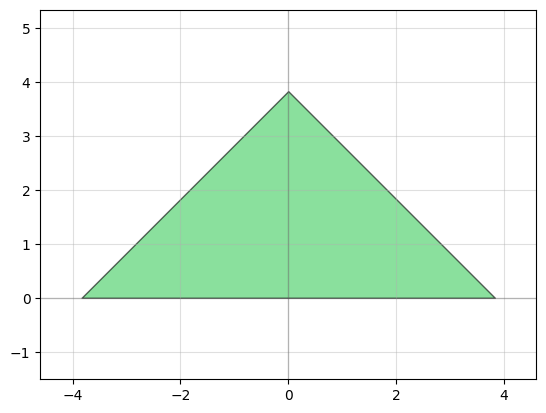

In [ ]:
import numpy as np
from phidl import Device

pi_len1 = 8.5

def create_triangle(base_length, angle):
    # Convert angle to radians
    angle_rad = np.radians(angle)

    # Calculate the height of the triangle using trigonometry
    height = (base_length / 2) / np.tan(angle_rad)

    # Define the points of the triangle
    points = [
        (-base_length / 2, 0),  # Bottom-left corner
        (base_length / 2, 0),   # Bottom-right corner
        (0, height)             # Top vertex
    ]

    # Create the device and add the triangle as a polygon
    D = Device()
    D.add_polygon(points)
    return D

# Parameters
h = 1
l_max = 2*pi_len/(2**2-1)
angle = 45  # Degrees
base_len = l_max + 2*h/np.tan(np.radians(angle))
print(l_max)
print(base_len)


# Create the triangle device
triangle_device = create_triangle(base_len, angle)

# Preview the device
qp(triangle_device)


2.8333333333333335
5.666666666666667
1.2142857142857142
2.4285714285714284
3.6428571428571423
0.5666666666666667
1.1333333333333333
1.7
2.2666666666666666
0.27419354838709675
0.5483870967741935
0.8225806451612903
1.096774193548387
1.3709677419354838


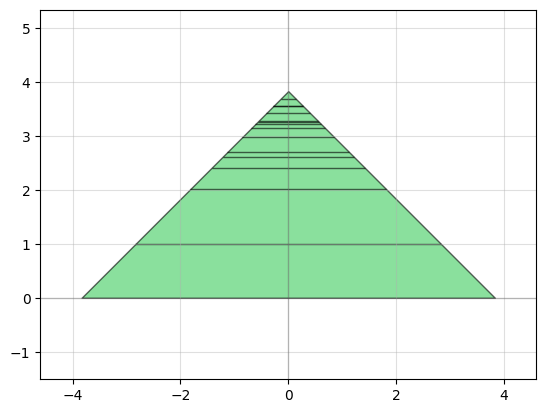

In [ ]:
import numpy as np
from phidl import Device

pi_len = 8.5
def create_triangle(base_length, angle):
    # Convert angle to radians
    angle_rad = np.radians(angle)

    # Calculate the height of the triangle using trigonometry
    height = (base_length / 2) / np.tan(angle_rad)

    # Define the points of the triangle
    points = [
        (-base_length / 2, 0),  # Bottom-left corner
        (base_length / 2, 0),   # Bottom-right corner
        (0, height)             # Top vertex
    ]

    # Create the device and add the triangle as a polygon
    D = Device()
    D.add_polygon(points)
    return D

def add_horizontal_line(D, desired_width):
    # Calculate the base length and height from the bounding box
    bbox = D.bbox  # [[x_min, y_min], [x_max, y_max]]
    x_min, y_min = bbox[0]
    x_max, y_max = bbox[1]
    
    base_length = x_max - x_min
    height = y_max - y_min

    if desired_width > base_length:
        raise ValueError("Desired width exceeds the base length of the triangle.")

    # Calculate the y-coordinate for the desired width using triangle similarity
    y_line = height * (1 - desired_width / base_length)

    # Define the endpoints of the horizontal line
    x_left = -desired_width / 2
    x_right = desired_width / 2
    line_points = [(x_left, y_line), (x_right, y_line)]

    # Add the horizontal line to the device
    D.add_polygon(line_points, layer=(1, 0))
    return D, y_line

# Parameters
h = 1
seg_num = 5
l_max = 2 * pi_len / (2**2 - 1)
angle = 45  # Degrees
base_len = l_max + 2 * h / np.tan(np.radians(angle))
# print(l_max)
# print(base_len)

# Create the triangle device
triangle_device = create_triangle(base_len, angle)


for i in range(2,6): # 2 3 4 5
    unit_len = pi_len / (2**i - 1) 
    for j in range(1,i+1): 
        triangle_device , y_move = add_horizontal_line(triangle_device, j*unit_len)
        print(j*unit_len)

# Preview the device
from phidl import quickplot as qp
#triangle_device.move([0,-y_move])
qp(triangle_device)


In [ ]:
def triangle(base_length, angle, layer = layer_pcm):
    # Convert angle to radians
    angle_rad = np.radians(angle)
    height = (base_length / 2) / np.tan(angle_rad)

    # Define the points of the triangle
    points = [
        (-base_length / 2, 0),  # Bottom-left corner
        (base_length / 2, 0),   # Bottom-right corner
        (0, height)             # Top vertex
    ]

    # Create the device and add the triangle as a polygon
    D = Device()
    D.add_polygon(points, layer = layer)
    return D, height

def tri_displace(D, desired_width):
    # Calculate the base length and height from the bounding box
    bbox = D.bbox  # [[x_min, y_min], [x_max, y_max]]
    x_min, y_min = bbox[0]
    x_max, y_max = bbox[1]
    
    base_length = x_max - x_min
    height = y_max - y_min

    if desired_width > base_length:
        raise ValueError("Desired width exceeds the base length of the triangle.")

    y_line = height * (1 - desired_width / base_length)

    return y_line

segment_num = 5
for s in range(int(segment_num)): # 0 1, 0 1 2, 0 1 2 3, 0 1 2 3 4
    ln = unit_len*2**s # desired width
    pcm_top, h_t = triangle(base_len, 45)
    y_move = tri_displace(pcm_top, ln)


2
1
2
-
3
1
2
3
-
4
1
2
3
4
-
5
1
2
3
4
5
-


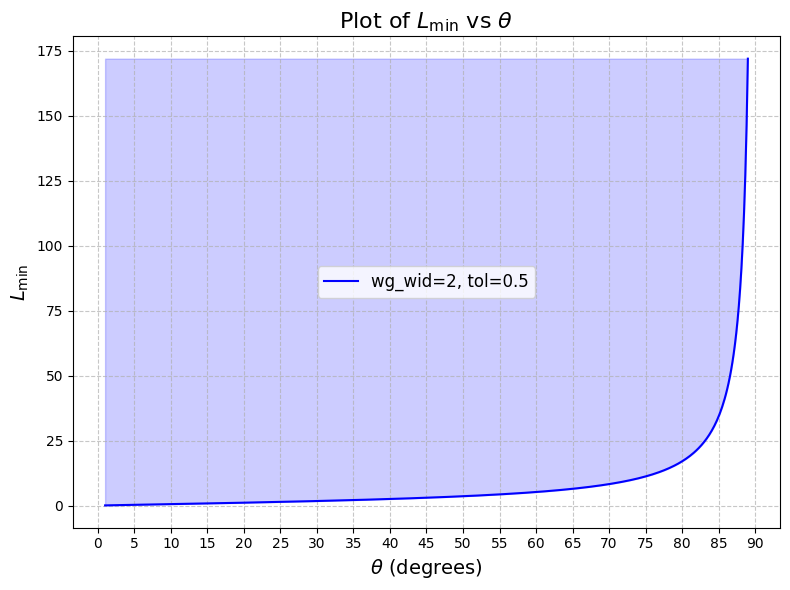

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Define constants
wg_wid = 2  # Width of the waveguide
tol = 0.5   # Tolerance value

# Define the function L_min
def L_min(theta, wg_wid, tol):
    # Convert theta from degrees to radians
    theta_rad = np.radians(theta)
    return 2 * np.tan(theta_rad) * (0.5 * wg_wid + tol)

# Generate theta values
theta_values = np.linspace(1, 89, 500)  # Theta from 1° to 89° to avoid tan(90°) singularity

# Calculate L_min for each theta
L_min_values = L_min(theta_values, wg_wid, tol)

# Plot L_min versus theta
plt.figure(figsize=(8, 6))
plt.plot(theta_values, L_min_values, color='b', label=f"wg_wid={wg_wid}, tol={tol}")
plt.fill_between(theta_values, L_min_values, L_min_values.max() * 1, color='blue', alpha=0.2)
plt.gca().xaxis.set_major_locator(MultipleLocator(5))


# Add labels, title, and legend
plt.xlabel(r'$\theta$ (degrees)', fontsize=14)
plt.ylabel(r'$L_{\text{min}}$', fontsize=14)
plt.title(r'Plot of $L_{\text{min}}$ vs $\theta$', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [21]:
import numpy as np
wg_wid = 2
tol = 0.5
theta_rad = np.radians(13)
print(2 * np.tan(theta_rad) * (0.5 * wg_wid + tol))

0.6926045733766893


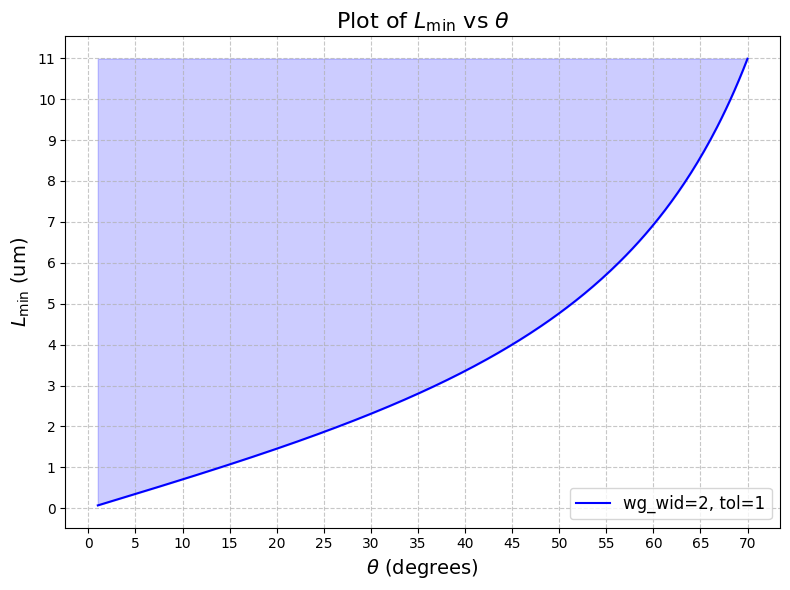

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Define constants
wg_wid = 2  # Width of the waveguide
tol = 1    # Tolerance value

# Define the function L_min
def L_min(theta, wg_wid, tol):
    # Convert theta from degrees to radians
    theta_rad = np.radians(theta)
    return 2 * np.tan(theta_rad) * (0.5 * wg_wid + tol)

# Generate theta values
theta_values = np.linspace(1, 70, 300)  # Theta from 1° to 89° to avoid tan(90°) singularity

# Calculate L_min for each theta
L_min_values = L_min(theta_values, wg_wid, tol)

# Plot L_min versus theta
plt.figure(figsize=(8, 6))
plt.plot(theta_values, L_min_values, color='b', label=f"wg_wid={wg_wid}, tol={tol}")
plt.fill_between(theta_values, L_min_values, L_min_values.max() * 1, color='blue', alpha=0.2)
plt.gca().xaxis.set_major_locator(MultipleLocator(5))
plt.gca().yaxis.set_major_locator(MultipleLocator(1))

# Add labels, title, and legend
plt.xlabel(r'$\theta$ (degrees)', fontsize=14)
plt.ylabel(r'$L_{\text{min}}$ (um)', fontsize=14)
plt.title(r'Plot of $L_{\text{min}}$ vs $\theta$', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

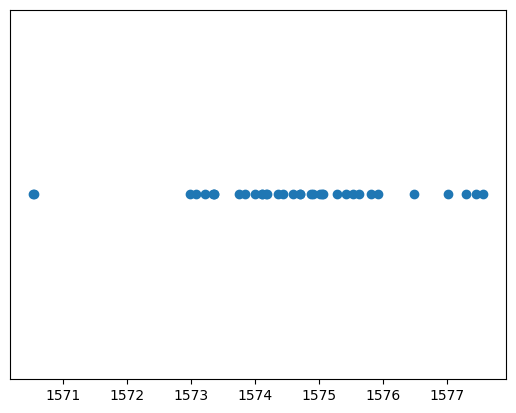

In [23]:
import matplotlib.pyplot as plt
res = [1575.43, 1574.00, 1575.05, 1574.12, 1577.45, 1576.49, 1574.17, 1575.81, 1573.37, 1573.08, 1573.23, 1573.76, 1574.59, 1570.53, 1574.87, 1577.29, 1573.84, 1575.28, 1575.06, 1577.57, 1574.91, 1575.02, 1574.44, 1575.63, 1574.71, 1573.35, 1574.37, 1577.02, 1574.70, 1570.55, 1575.92, 1575.54, 1573.36, 1574.19, 1574.12, 1572.99]

# Create the plot
plt.plot(res, [0] * len(res), 'o') # 'o' specifies marker style as circles

# Remove y-axis
plt.yticks([])

# Display the plot
plt.show()

36
36


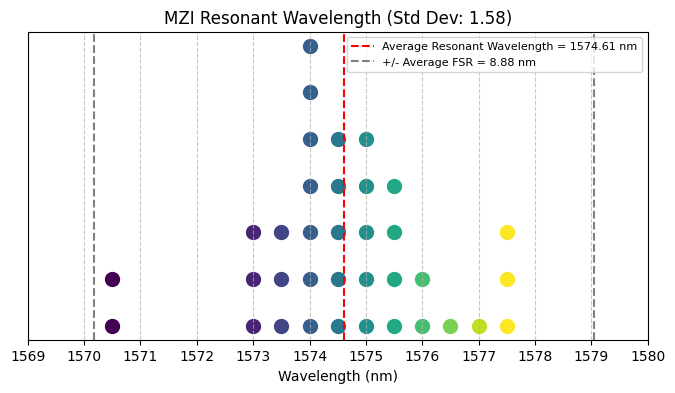

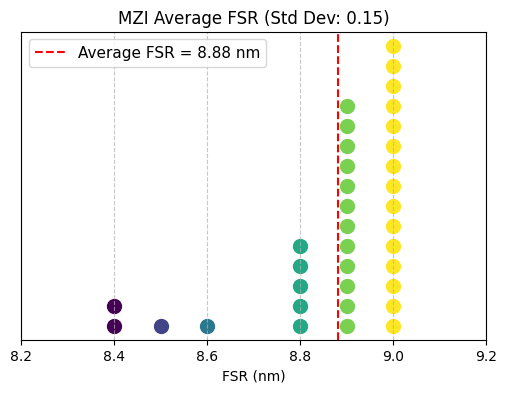

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
res = [1575.43, 1574.00, 1575.05, 1574.12, 1577.45, 1576.49, 1574.17, 1575.81, 1573.37, 1573.08, 1573.23, 1573.76, 1574.59, 1570.53, 1574.87, 1577.29, 1573.84, 1575.28, 1575.06, 1577.57, 1574.91, 1575.02, 1574.44, 1575.63, 1574.71, 1573.35, 1574.37, 1577.02, 1574.70, 1570.55, 1575.92, 1575.54, 1573.36, 1574.19, 1574.12, 1572.99]
res_roun = [1575.5, 1574.0, 1575.0, 1574.0, 1577.5, 1576.5, 1574.0, 1576, 1573.5, 1573.0, 1573.0, 1574, 1574.5, 1570.5, 1575, 1577.5, 1574, 1575.5, 1575.0, 1577.5, 1575, 1575.0, 1574.5, 1575.5, 1574.5, 1573.5, 1574.5, 1577.0, 1574.5, 1570.5, 1576, 1575.5, 1573.5, 1574.0, 1574.0, 1573]
res_round = [1575, 1574, 1575, 1574, 1577, 1576, 1574, 1576, 1573, 1573, 1573, 1574, 1575, 1571, 1575, 1577, 1574, 1575, 1575, 1578, 1575, 1575, 1574, 1576, 1575, 1573, 1574, 1577, 1575, 1571, 1576, 1576, 1573, 1574, 1574, 1573]


fsr = [8.82, 8.98, 8.53, 8.93, 8.97, 8.42, 8.39, 8.82, 8.96, 8.95, 9.00, 8.87, 8.92, 8.96, 8.89, 8.99, 8.98, 9.00, 8.59, 9.02, 8.83, 8.82, 8.97, 8.95, 8.94, 8.94, 8.93, 8.93, 9.01, 8.85, 8.94, 8.89, 8.95, 8.93, 8.97, 8.91]
fsr_round = np.round(fsr, decimals=1)
fsr_avg = sum(fsr) / len(fsr)
fsr_std_dev = np.std(fsr, ddof=0)

def create_dot_plot(data):
    unique_values, counts = np.unique(data, return_counts=True)
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_values)))  # Generate colors

    avg = sum(data) / len(data)
    std_dev = np.std(data, ddof=0)
    
    plt.figure(figsize=(8, 4))
    
    for i, (val, count) in enumerate(zip(unique_values, counts)):
        plt.scatter([val] * count, range(1, count + 1), s=100, color=colors[i])

    plt.axvline(x=avg, color = 'r', linestyle='--', label = f"Average Resonant Wavelength = {avg:.2f} nm")
    plt.axvline(x=avg+fsr_avg/2, color = 'grey', linestyle='--', label = "+/- Average FSR = 8.88 nm")
    plt.axvline(x=avg-fsr_avg/2, color = 'grey', linestyle='--')
    plt.xticks(np.arange(1569, 1581, step=1))
    plt.yticks([])
    plt.xlabel("Wavelength (nm)")
    plt.title(f"MZI Resonant Wavelength (Std Dev: {std_dev:.2f})")
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.legend(fontsize=8)
    
    plt.show()


create_dot_plot(res_roun)

unique_values, counts = np.unique(fsr_round, return_counts=True)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_values)))  # Generate colors

plt.figure(figsize=(6, 4))

for i, (val, count) in enumerate(zip(unique_values, counts)):
    plt.scatter([val] * count, range(1, count + 1), s=100, color=colors[i])

plt.axvline(x=fsr_avg, color = 'r',linestyle='--', label = f"Average FSR = {fsr_avg:.2f} nm")
plt.xticks(np.arange(8.2, 9.3, step=0.2))
plt.yticks([])
plt.xlabel("FSR (nm)")
plt.title(f"MZI Average FSR (Std Dev: {fsr_std_dev:.2f})")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(fontsize=11)

plt.show()

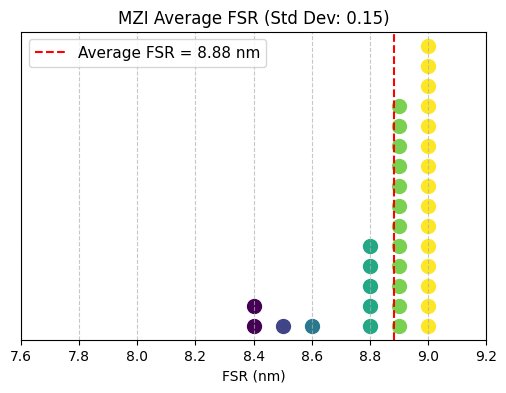

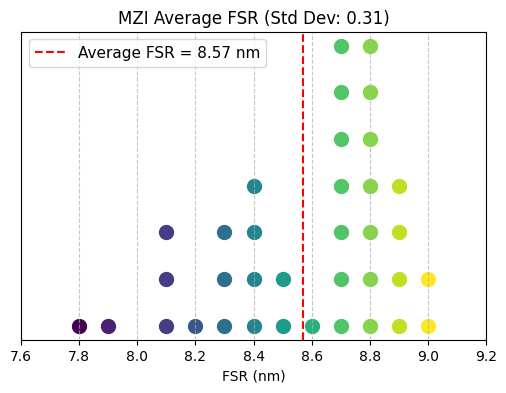

In [14]:
#Initial Measurement After PCM Deposition

import matplotlib.pyplot as plt
import numpy as np
fsr = [8.82, 8.98, 8.53, 8.93, 8.97, 8.42, 8.39, 8.82, 8.96, 8.95, 9.00, 8.87, 8.92, 8.96, 8.89, 8.99, 8.98, 9.00, 8.59, 9.02, 8.83, 8.82, 8.97, 8.95, 8.94, 8.94, 8.93, 8.93, 9.01, 8.85, 8.94, 8.89, 8.95, 8.93, 8.97, 8.91]


unique_values, counts = np.unique(fsr_round, return_counts=True)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_values)))  # Generate colors

plt.figure(figsize=(6, 4))

for i, (val, count) in enumerate(zip(unique_values, counts)):
    plt.scatter([val] * count, range(1, count + 1), s=100, color=colors[i])

plt.axvline(x=fsr_avg, color = 'r',linestyle='--', label = f"Average FSR = {fsr_avg:.2f} nm")
plt.xticks(np.arange(7.6, 9.3, step=0.2))
plt.yticks([])
plt.xlabel("FSR (nm)")
plt.title(f"MZI Average FSR (Std Dev: {fsr_std_dev:.2f})")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(fontsize=11)

plt.show()




# new values idep

fsr_idep = [8.12, 8.12, 8.68, 7.90, 8.89, 8.83, 8.51, 8.81, 8.71, 9.01, 8.83, 8.80, 8.67, 8.72, 8.70, 8.42, 8.34, 8.20, 8.88, 8.80, 8.13, 8.90, 8.78, 8.98, 8.72, 8.66, 8.43, 8.64, 8.40, 8.94, 8.49, 8.43, 7.78, 8.27, 8.26, 8.79]
fsr_round_idep = np.round(fsr_idep, decimals=1)
fsr_avg_idep = sum(fsr_idep) / len(fsr_idep)
fsr_std_dev_idep = np.std(fsr_idep, ddof=0)

unique_values, counts = np.unique(fsr_round_idep, return_counts=True)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_values)))  # Generate colors

plt.figure(figsize=(6, 4))

for i, (val, count) in enumerate(zip(unique_values, counts)):
    plt.scatter([val] * count, range(1, count + 1), s=100, color=colors[i])

plt.axvline(x=fsr_avg_idep, color = 'r',linestyle='--', label = f"Average FSR = {fsr_avg_idep:.2f} nm")
plt.xticks(np.arange(7.6, 9.3, step=0.2))
plt.yticks([])
plt.xlabel("FSR (nm)")
plt.title(f"MZI Average FSR (Std Dev: {fsr_std_dev_idep:.2f})")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(fontsize=11)

plt.show()

